In [14]:
# importing dependancies
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time
from datetime import datetime
import requests
from config import weather_api_key


# Magic words ~ooo
%matplotlib inline


In [15]:
#generating random longitude and Latitude

# Method 1) using individual .random() statements and combining them

# generate random integer, and add to random float 0-1
#random_number = random.randint(-90,90) + random.random()

#loop to create x number of values

loop_counter = 0

latitudes = []

while loop_counter < 10:
    random_number = random.randint(-90,90) + random.random()
    latitudes.append(random_number)
    loop_counter += 1
    
latitudes


[28.35175150683878,
 -79.46066297237707,
 -2.124349455457046,
 -86.63693337109054,
 -46.60392863220255,
 28.429378205989256,
 -7.852489674434906,
 -66.0610676954793,
 66.9082254093122,
 -88.28079838199916]

In [16]:
#generating random longitude and Latitude

# Method 2 using NumPy Method

def latitude_numpy(list_size):
    latitude_numpy = []
    counter = 0
    
    while list_size < list_size:
            random_lat = np.random.uniform(-90,90,size=list_size)
            counter += 1
            
    return latitudes

%timeit latitude_numpy(1500)



72.3 ns ± 0.594 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [17]:
#generating latitude longitude pairs

lats = np.random.uniform(-90,90,size=1500)
longs =np.random.uniform(-180,180,size=1500)
lats_longs = zip(lats,longs)
lats_longs

In [18]:
from citipy import citipy

cities = []

# identify nearest city for each lat long pair store in cities

for citipy_search in lats_longs:
    city = citipy.nearest_city(citipy_search[0], citipy_search[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)
# 627 unique cities    

614

In [19]:
# API call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | lolua
City not found. Skipping...
Processing Record 3 of Set 1 | kaka
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | turayf
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | mangrol
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | batagay-alyta
Processing Record 20 of Set 1 | marystown
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | hami
Pr

Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | tiznit
Processing Record 41 of Set 4 | mehamn
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | lavumisa
Processing Record 49 of Set 4 | hokitika
Processing Record 50 of Set 4 | labuhan
Processing Record 1 of Set 5 | port moresby
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | vestmanna
Processing Record 5 of Set 5 | wschowa
Processing Record 6 of Set 5 | ipixuna
Processing Record 7 of Set 5 | changping
Processing Record 8 of Set 5 | uyuni
Processing Record 9 of Set 5 | coruripe
Processing Record 10 of Set 5 | san andres
Processing Record 11 of Set 5 | san policarpo
Processing Record 12 of Set 5 | dabakala
Processi

Processing Record 28 of Set 8 | temaraia
City not found. Skipping...
Processing Record 29 of Set 8 | sioni
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | trelew
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | sitio novo do tocantins
Processing Record 39 of Set 8 | bengkulu
Processing Record 40 of Set 8 | emmett
Processing Record 41 of Set 8 | novoagansk
Processing Record 42 of Set 8 | arcachon
Processing Record 43 of Set 8 | svetlyy
Processing Record 44 of Set 8 | chicla
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | porto novo
Processing Record 47 of Set 8 | deer lake
Processing Record 48 of Set 8 | sri aman
Processing Record 49 of Set 8 | khonuu
City not found. Sk

Processing Record 15 of Set 12 | itarema
Processing Record 16 of Set 12 | pionki
Processing Record 17 of Set 12 | kuching
Processing Record 18 of Set 12 | pau brasil
Processing Record 19 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 12 | laguna
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | jumla
Processing Record 23 of Set 12 | yelizovo
Processing Record 24 of Set 12 | college
Processing Record 25 of Set 12 | vardo
Processing Record 26 of Set 12 | karaul
City not found. Skipping...
Processing Record 27 of Set 12 | aykhal
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | dawlatabad
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | qafsah
City not found. Skipping...
Processing Record 32 of Set 12 | menongue
Processing Record 33 of Set 12 | afrikanda
Processing Record 34 of Set 12 | catarman
Processing Record 35 of Set 12 | gold coast
Processing Record 36 of Set 12 | tuy hoa
Processing

In [22]:
# create a dataframe from the list of dictionaries
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

output_data_file = os.path.join("weather_data","cities.csv")
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
today = time.strftime("%x")
today

'08/03/22'

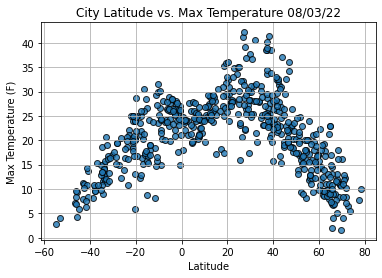

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

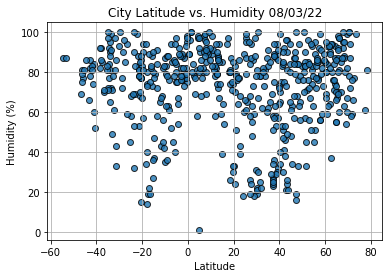

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

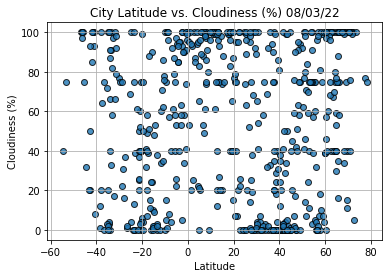

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

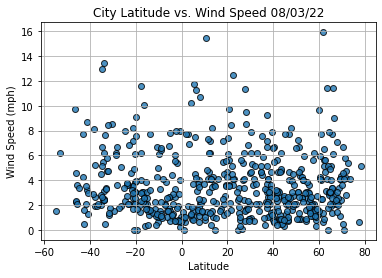

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [65]:
# Build a linear regression function call 

from scipy.stats import linregress

# define a function to create linear regressions so I don't have to copy pasta code

def plot_linear_regression(x_value, y_value, title, y_label, text_coordinates):
    
    # run regression
    (slope, intercept, r_value, p_value,sterr) = linregress(x_value,y_value)
     
    # calculate regression values
    regress_values = x_value * slope + intercept
     
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
     
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [66]:
# generate hemisphere dataframes
north_hemisphere_df = city_data_df.loc[city_data_df["Lat"]>= 0]
south_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

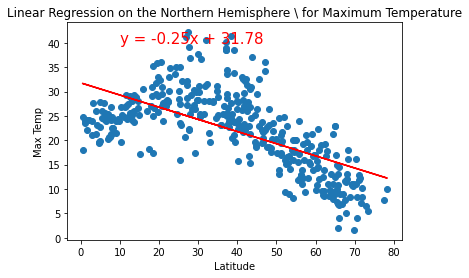

In [67]:
# north hemisphere maximum temperature linear regression
x_value = north_hemisphere_df["Lat"]
y_value = north_hemisphere_df["Max Temp"]

plot_linear_regression(x_value, y_value,"Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 'Max Temp',(10,40))

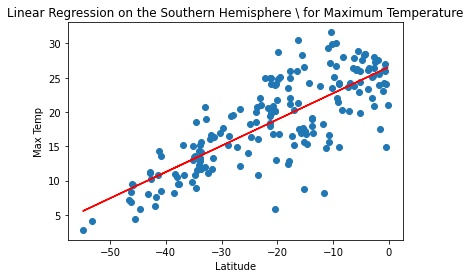

In [70]:
x_value = south_hemisphere_df["Lat"]
y_value = south_hemisphere_df["Max Temp"]
# Call the function.
plot_linear_regression(x_value, y_value,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))